In [1]:
from func_search import *
from func_def_class import *
from func_taux_transm import *
from func_res import *


import os
from path import Path
import csv
#import matplotlib.pyplot as plt 
import ConfigParser
from struct import unpack
import re
import numpy as np


In [2]:
import matplotlib.pyplot as plt
from pandas import *
import pandas as pd
import ast
from sklearn.tree import *
from sklearn import tree
import pydotplus 
from IPython.display import Image 

In [19]:
df_res = pd.read_csv(r'data_csv/res.csv', dtype=str)
df_res["numAttempts"] = df_res["numAttempts"].astype(int)
df_res["nb_sibl"] = df_res["nb_sibl"].astype(int)
df_res["succes"] = df_res["succes"].astype(int)
df_res["state"] = df_res["state"].astype(int)
df_res["asn creation"] = df_res["asn creation"].astype(int)
df_res["asn_req"] = df_res["asn_req"].astype(float)
df_res = df_res.fillna('')
df_res.sort_values(['asn creation', 'asn_req'], ascending=[True, True], inplace=True)
df_res = df_res.reset_index(drop=True)
df_res

,asn creation,asn_req,asn_rep,asn_tx,src,dest,owner,succes,numAttempts,colision,...,slot2,ch2,s2,slot3,ch3,s3,state,nb_sibl,nb_fils,diff_asn
0,1221,1299,1583,,b381,b868,b868,1,1,,...,163,12,0,93,11,1,4,2,,
1,1221,1299,1583,1258,b381,b868,b868,1,1,3,...,163,12,0,93,11,1,4,2,,
2,1221,1299,1583,1299,b381,b868,b868,1,1,1,...,163,12,0,93,11,1,4,2,,
3,1221,1299,1583,1542,b381,b868,b868,1,1,1,...,163,12,0,93,11,1,4,2,,
4,1221,1299,1583,1583,b381,b868,b868,1,1,1,...,163,12,0,93,11,1,4,2,,
5,1221,1339,1562,,8772,b868,b868,1,1,,...,38,14,0,141,9,1,4,2,,
6,1221,1339,1562,1258,8772,b868,b868,1,1,3,...,38,14,0,141,9,1,4,2,,
7,1221,1339,1562,1339,8772,b868,b868,1,1,1,...,38,14,0,141,9,1,4,2,,
8,1221,1339,1562,1562,8772,b868,b868,1,1,1,...,38,14,0,141,9,1,4,2,,
9,1221,2407,,,1162,b868,b868,0,1,,...,64,14,0,89,7,0,-1,2,,


In [4]:
df_tx = pd.read_csv(r'data_csv/pkt_tx.csv', dtype=str)
df_tx["asn"] = df_tx["asn"].astype(int)
df_tx["numTxAttempts"] = df_tx["numTxAttempts"].astype(int)
df_tx["trackinstance"] = df_tx["trackinstance"].astype(int)
df_tx = df_tx.fillna('')
df_tx

,time,addr,comp,asn,statType,trackinstance,trackowner,length,frameType,slotOffset,frequency,l2Dest,txpower,numTxAttempts,queuePos,succes_rx,succes_ack,list_rx
0,"2017-04-07 09:30:58,882",b868,22,730,3,0,0000000000000000,47,IEEE154_TYPE_DATA,121,16,ffffffffffffffff,31,1,0,0,0,[]
1,"2017-04-07 09:31:07,538",b868,12,1015,3,0,0000000000000000,67,IEEE154_TYPE_BEACON,0,16,ffffffffffffffff,31,1,0,1,0,"['8772', 'b381', '1162', 'c280']"
2,"2017-04-07 09:31:09,884",b868,22,1096,3,0,0000000000000000,47,IEEE154_TYPE_DATA,81,16,ffffffffffffffff,31,1,0,1,0,"['b381', '1162', '8772']"
3,"2017-04-07 09:31:14,754",8772,15,1258,3,0,0000000000000000,61,IEEE154_TYPE_DATA,40,16,054332ff03dab868,31,1,0,0,0,[]
4,"2017-04-07 09:31:14,754",b381,15,1258,3,0,0000000000000000,61,IEEE154_TYPE_DATA,40,16,054332ff03dab868,31,1,0,0,0,[]
5,"2017-04-07 09:31:14,755",1162,12,1258,3,0,0000000000000000,67,IEEE154_TYPE_BEACON,40,16,ffff000000000000,31,1,1,0,0,[]
6,"2017-04-07 09:31:15,477",1162,15,1282,3,0,0000000000000000,61,IEEE154_TYPE_DATA,81,16,054332ff03dab868,31,1,0,0,0,[]
7,"2017-04-07 09:31:15,990",b381,15,1299,3,0,0000000000000000,61,IEEE154_TYPE_DATA,81,16,054332ff03dab868,31,2,0,1,1,['b868']
8,"2017-04-07 09:31:17,191",8772,15,1339,3,0,0000000000000000,61,IEEE154_TYPE_DATA,121,16,054332ff03dab868,31,2,0,1,1,['b868']
9,"2017-04-07 09:31:18,453",b381,22,1380,3,0,0000000000000000,47,IEEE154_TYPE_DATA,162,16,ffffffffffffffff,31,1,0,1,0,['1162']


In [8]:
df_r = pd.read_csv(r'data_csv/res_step.csv', dtype=str)
df_r = df_r.fillna('')
df_r["asn"] = df_r["asn"].astype(int)
df_r.sort_values(["asn", "info"], ascending=[True, False], inplace=True)
df_r


,asn,src,dest,owner,ch,slot,queuePos,info
0,1221,8772,b868,b868,,,0,linkreq enqueued
1,1221,b381,b868,b868,,,0,linkreq enqueued
2,1221,1162,b868,b868,,,0,linkreq enqueued
3,1299,b381,b868,,,,0,linkreq txed
4,1299,b381,b868,b868,11,93,1,LinkReq rcvd - LinkRep prepared
5,1339,8772,b868,,,,0,linkreq txed
6,1339,8772,b868,b868,9,141,2,LinkReq rcvd - LinkRep prepared
7,1562,8772,b868,b868,,,2,LinkRep txed
8,1562,8772,b868,b868,,,,LinkRep rcvd - Res successful
9,1583,b381,b868,b868,,,1,LinkRep txed


In [21]:
df_fils = pd.read_csv(r'data_csv/sons.csv', dtype=str)
df_fils["asn"] = df_fils["asn"].astype(int)
df_fils

,asn,parent,fils
0,1221,b868,['b381']
1,1221,b868,"['b381', '8772']"
2,1221,b868,"['b381', '8772', '1162']"
3,1627,8772,['c280']
4,1830,8772,['c280']
5,2439,b868,"['b381', '8772', '1162']"
6,3248,b868,"['b381', '8772', '1162', 'c280']"
7,3248,8772,[]
8,3251,b868,"['b381', '8772', '1162', 'c280']"
9,4266,b868,"['b381', '8772', '1162', 'c280']"


In [20]:
df_parent = pd.read_csv(r'data_csv/parent.csv', dtype=str)
df_parent["asn"] = df_parent["asn"].astype(int)
df_parent = df_parent.fillna('')
df_parent

,asn,addr,parent,old_parent,info
0,1221,b381,b868,,res triggered
1,1221,8772,b868,,res triggered
2,1221,1162,b868,,res triggered
3,1627,c280,8772,,res triggered
4,1830,c280,8772,,res triggered
5,2439,1162,b868,,res triggered
6,3248,c280,b868,8772,parent update
7,3251,c280,b868,,res triggered
8,4266,1162,b868,,res triggered
9,5684,1162,b381,b868,parent update


In [5]:
df_res.loc[df_res['asn_tx']==1583]

,asn creation,asn_req,asn_rep,asn_tx,src,dest,owner,succes,numAttempts,colision,...,ch1,s1,slot2,ch2,s2,slot3,ch3,s3,state,nb_sibl


In [6]:
df_res[['src', 'dest', 'state','colision', "nb_req", "nb_rep"]]

,src,dest,state,colision,nb_req,nb_rep
1,b381,b868,4,,,
0,8772,b868,4,,,
2,1162,b868,-1,,,
3,c280,8772,4,,,
4,c280,8772,4,,,
5,8772,b868,4,,,
6,1162,b868,-1,,,
7,8772,b868,-1,,,
8,b381,b868,4,,,
9,c280,b868,4,,,


In [113]:
for i in range(len(df_test)):
    df_test.loc[i]["diff_req"]=df_test.loc[i]["asn creation"]-df_test.loc[i]["asn_req"]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [119]:
l = df_res.columns.tolist()
print l

['asn creation', 'asn_req', 'asn_rep', 'asn_tx', 'src', 'dest', 'owner', 'succes', 'numAttempts', 'colision', 'nb_req', 'req_1', 'req_2', 'req_3', 'req_4', 'nb_rep', 'rep_1', 'rep_2', 'rep_3', 'rep_4', 'queuePos', 'nbCellsReq', 'nbCellsRep', 'slot1', 'ch1', 's1', 'slot2', 'ch2', 's2', 'slot3', 'ch3', 's3', 'state', 'nb_sibl']


In [9]:
df_test = df_res.loc[(df_res["asn_req"]!='') & (df_res["asn_tx"]!='')]
df_test = df_test.reset_index(drop=True)

In [5]:
features = ['numAttempts', 'colision', 'nb_req',  'nbCellsReq', 'nb_sibl']


In [10]:
df_test["numAttempts"] = df_test["numAttempts"].astype(int)
df_test["colision"] = df_test["colision"].astype(int)
df_test["nb_req"] = df_test["nb_req"].astype(int)
df_test["nbCellsReq"] = df_test["nbCellsReq"].astype(int)
df_test["nb_sibl"] = df_test["nb_sibl"].astype(int)


In [11]:
X = df_test[features]


In [12]:
y = df_test["succes"]
#on met les succes -1 a 0 (echec de toute facon)
y.loc[y==-1] = 0
targets = y.unique()

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [82]:
#X["nb_sibl"] = X["nb_sibl"].astype(int)
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      0
10     0
11     0
12     0
13     0
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     0
26     0
27     0
28     0
29     0
      ..
328    0
329    0
330    0
331    0
332    0
333    0
334    0
335    0
336    0
337    0
338    0
339    0
340    1
341    1
342    1
343    1
344    0
345    0
346    1
347    1
348    1
349    1
350    1
351    1
352    1
353    1
354    1
355    1
356    1
357    1
Name: succes, Length: 358, dtype: int64

In [21]:
print type(X.iloc[0][0])

<type 'numpy.int64'>


In [21]:
len(y.loc[y==0])

52

In [17]:
targets

array([1, 0])

In [15]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

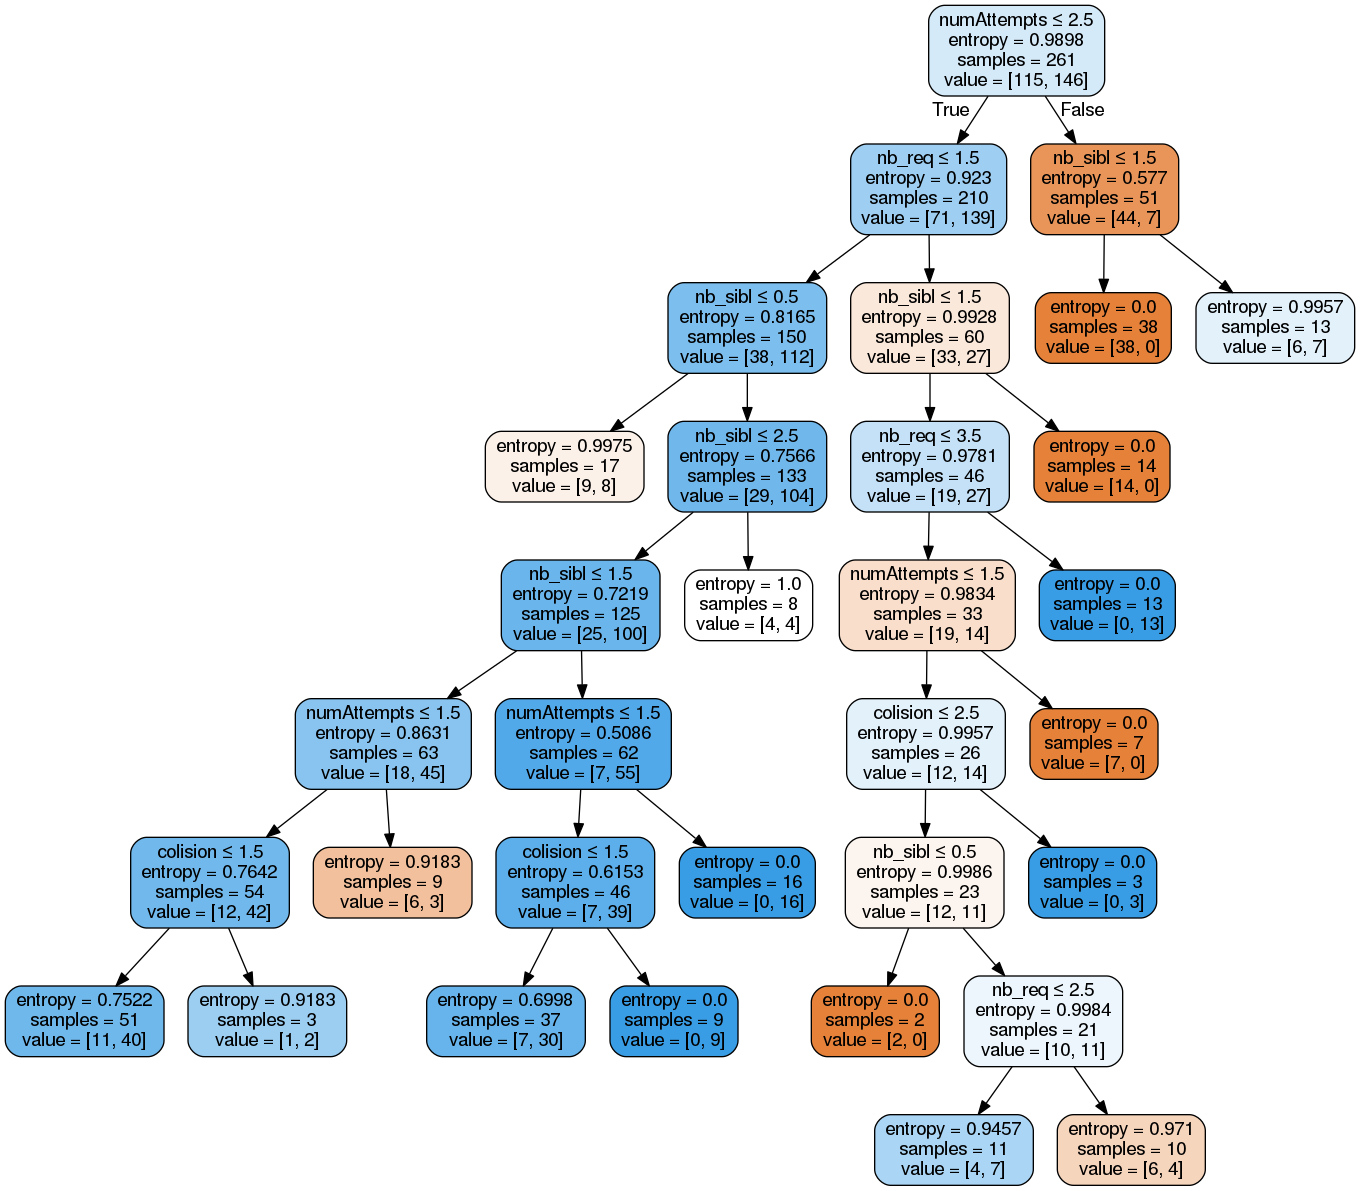

In [16]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [18]:
df_res.loc[(df_res["succes"]==1) & (df_res["asn_tx"]!='')]

,asn creation,asn_req,asn_rep,asn_tx,src,dest,owner,succes,numAttempts,colision,...,ch1,s1,slot2,ch2,s2,slot3,ch3,s3,state,nb_sibl
1,1221,1299,1583,1258,b381,b868,b868,1,1,3,...,2,0,163,12,0,93,11,1,4,1
2,1221,1299,1583,1299,b381,b868,b868,1,1,1,...,2,0,163,12,0,93,11,1,4,1
3,1221,1299,1583,1542,b381,b868,b868,1,1,1,...,2,0,163,12,0,93,11,1,4,1
4,1221,1299,1583,1583,b381,b868,b868,1,1,1,...,2,0,163,12,0,93,11,1,4,1
6,1221,1339,1562,1258,8772,b868,b868,1,1,3,...,15,0,38,14,0,141,9,1,4,1
7,1221,1339,1562,1339,8772,b868,b868,1,1,1,...,15,0,38,14,0,141,9,1,4,1
8,1221,1339,1562,1562,8772,b868,b868,1,1,1,...,15,0,38,14,0,141,9,1,4,1
15,1627,1664,1705,1664,c280,8772,b868,1,1,1,...,0,0,36,6,0,21,7,1,4,2
16,1627,1664,1705,1705,c280,8772,b868,1,1,2,...,0,0,36,6,0,21,7,1,4,2
18,1830,1867,2233,1867,c280,8772,b868,1,1,3,...,6,0,4,13,0,45,4,1,4,2


In [123]:
df_res.loc[(df_res["queuePos"]=='')]

,asn creation,asn_req,asn_rep,asn_tx,src,dest,owner,succes,numAttempts,colision,...,ch1,s1,slot2,ch2,s2,slot3,ch3,s3,state,nb_sibl


In [124]:
df_res["queuePos"].unique

<bound method Series.unique of 0      [1, 1]
1      [1, 1]
2      [1, 1]
3      [1, 1]
4      [1, 1]
5      [2, 2]
6      [2, 2]
7      [2, 2]
8      [2, 2]
9         [0]
10        [0]
11        [0]
12        [0]
13        [0]
14     [1, 1]
15     [1, 1]
16     [1, 1]
17     [1, 1]
18     [1, 1]
19     [1, 1]
20     [1, 1]
21     [1, 1]
22     [1, 1]
23     [1, 1]
24     [1, 1]
25        [0]
26        [0]
27        [0]
28        [0]
29        [1]
        ...  
328    [2, 2]
329    [2, 2]
330    [2, 2]
331    [2, 2]
332    [2, 2]
333    [4, 1]
334    [4, 1]
335    [4, 1]
336    [4, 1]
337       [3]
338       [3]
339       [3]
340    [1, 1]
341    [1, 1]
342    [1, 1]
343    [1, 1]
344       [1]
345       [1]
346    [2, 2]
347    [2, 2]
348    [2, 2]
349    [2, 2]
350    [1, 1]
351    [1, 1]
352    [1, 1]
353    [1, 1]
354    [2, 2]
355    [2, 2]
356    [2, 2]
357    [2, 2]
Name: queuePos, Length: 358, dtype: object>

In [31]:
df_res.loc[df_res["asn_rep"]=="1339"]

,asn creation,asn_req,asn_rep,asn_tx,src,dest,owner,succes,numAttempts,colision,...,ch1,s1,slot2,ch2,s2,slot3,ch3,s3,state,nb_sibl


In [48]:
B=[]
i=0
df_tmp = df_tx.loc[ (df_tx['asn']<=ast.literal_eval(df_res.loc[i]["asn_rep"])) & 
                                (df_tx['asn']>=ast.literal_eval(df_res.loc[i]["asn_req"])) &
                                (df_tx['addr']==df_res.loc[i]["dest"]) &
                                (df_tx['l2Dest'].str.endswith(df_res.loc[i]["src"])) &
                                (df_tx['frameType']=="IEEE154_TYPE_DATA") &
                                ((df_tx['trackinstance']==4) | (df_tx['trackinstance']==0) )]

B, asn_tx = get_simult_df(df_tmp, df_tx)
df_t = pd.DataFrame(columns=('asn creation', 'asn_req', 'asn_rep', 'asn_tx', 'src', 'dest', 'owner', 'succes', 'numAttempts', 'colision', 'nb_req', 'req_1', 'req_2', 'req_3', 'req_4','nb_rep', 'rep_1', 'rep_2', 'rep_3', 'rep_4', 'queuePos', 'nbCellsReq','nbCellsRep', 'slot1', 'ch1', 's1', 'slot2', 'ch2', 's2', 'slot3', 'ch3',  's3','state', 'nb_sibl'))



In [46]:
asn_tx

[]

In [49]:
df_tmp

,time,addr,comp,asn,statType,trackinstance,trackowner,length,frameType,slotOffset,frequency,l2Dest,txpower,numTxAttempts,queuePos,succes_rx,succes_ack,list_rx
16,"2017-04-07 09:31:23,891",b868,15,1562,3,4,054332ff03dab868,52,IEEE154_TYPE_DATA,141,16,054332ff03da8772,31,1,2,1,1,['8772']


In [87]:
df_res.loc[0]["state"]

4

In [52]:
df_res['nb_rep']

0     1
1     1
2     0
3     1
4     1
5     1
6     0
7     0
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    0
16    2
17    0
18    1
19    1
20    1
21    1
22    1
23    0
24    0
25    1
26    1
27    1
28    0
29    1
     ..
67    0
68    1
69    0
70    0
71    0
72    0
73    0
74    3
75    0
76    0
77    0
78    0
79    2
80    1
81    1
82    2
83    1
84    1
85    1
86    0
87    1
88    0
89    1
90    1
91    0
92    1
93    0
94    1
95    1
96    1
Name: nb_rep, Length: 97, dtype: object